In [1]:
pwd()  # cd() into this repo

"/groups/scicompsoft/home/arthurb/projects/darshan/ArthurKimChenPreibischDarshan2023"

In [2]:
]activate .

  Activating project at `~/projects/darshan/ArthurKimChenPreibischDarshan2023`


In [3]:
using TrainSpikingNet

In [4]:
N = (10000, 20000, 50000)

(10000, 20000, 50000)

In [5]:
for n in N
    @info n
    param("sinusoid-N$(n)-K512-L45/")
    config("sinusoid-N$(n)-K512-L45/", :cpu)
    init()
    train(nloops=10, correlation_interval=11)
end

[ Info: 10000


LBTConfig([ILP64] libmkl_rt.so, [LP64] libmkl_rt.so)
mean excitatory firing rate: 4.0659 Hz
mean inhibitory firing rate: 7.3334 Hz
loop #  task #  elapsed time (s)  firing rate (Hz)  correlation
     1       1           5.20617           5.45735  
     2       1           3.72275           5.46820  
     3       1           4.30672           5.47130  
     4       1           3.73788           5.47175  
     5       1           3.90307           5.48020  
     6       1           3.90553           5.48720  
     7       1           3.92317           5.47615  
     8       1           3.89566           5.49220  
     9       1           3.91707           5.49390  
    10       1           6.81463           5.48830  


[ Info: 20000


LBTConfig([ILP64] libmkl_rt.so, [LP64] libmkl_rt.so)
mean excitatory firing rate: 4.0611 Hz
mean inhibitory firing rate: 7.36715 Hz
loop #  task #  elapsed time (s)  firing rate (Hz)  correlation
     1       1           8.34436           5.47910  
     2       1           7.50077           5.48498  
     3       1           10.0101           5.48348  
     4       1           8.27358           5.48170  
     5       1           6.88719           5.48650  
     6       1           7.19020           5.47530  
     7       1           7.28512           5.47612  
     8       1           8.43275           5.48182  
     9       1           8.12890           5.49055  
    10       1           14.0420           5.48990  
LBTConfig([ILP64] libmkl_rt.so, [LP64] libmkl_rt.so)


[ Info: 50000


mean excitatory firing rate: 4.0598 Hz
mean inhibitory firing rate: 7.39286 Hz
loop #  task #  elapsed time (s)  firing rate (Hz)  correlation
     1       1           21.3817           5.48260  
     2       1           20.9500           5.48829  
     3       1           21.8089           5.48968  
     4       1           23.4352           5.49025  
     5       1           23.1968           5.49201  
     6       1           22.1879           5.49081  
     7       1           23.3028           5.49443  
     8       1           21.4732           5.49721  
     9       1           20.7787           5.50416  
    10       1           33.1985           5.50710  


In [6]:
using JLD2, Statistics

In [7]:
x = Float64[]
y = Float64[]
for n in N
    curve = load("sinusoid-N$(n)-K512-L45/learning-curve.jld2")
    push!(x, n)
    push!(y, median(curve["elapsed_time"]))
end

In [8]:
using CairoMakie

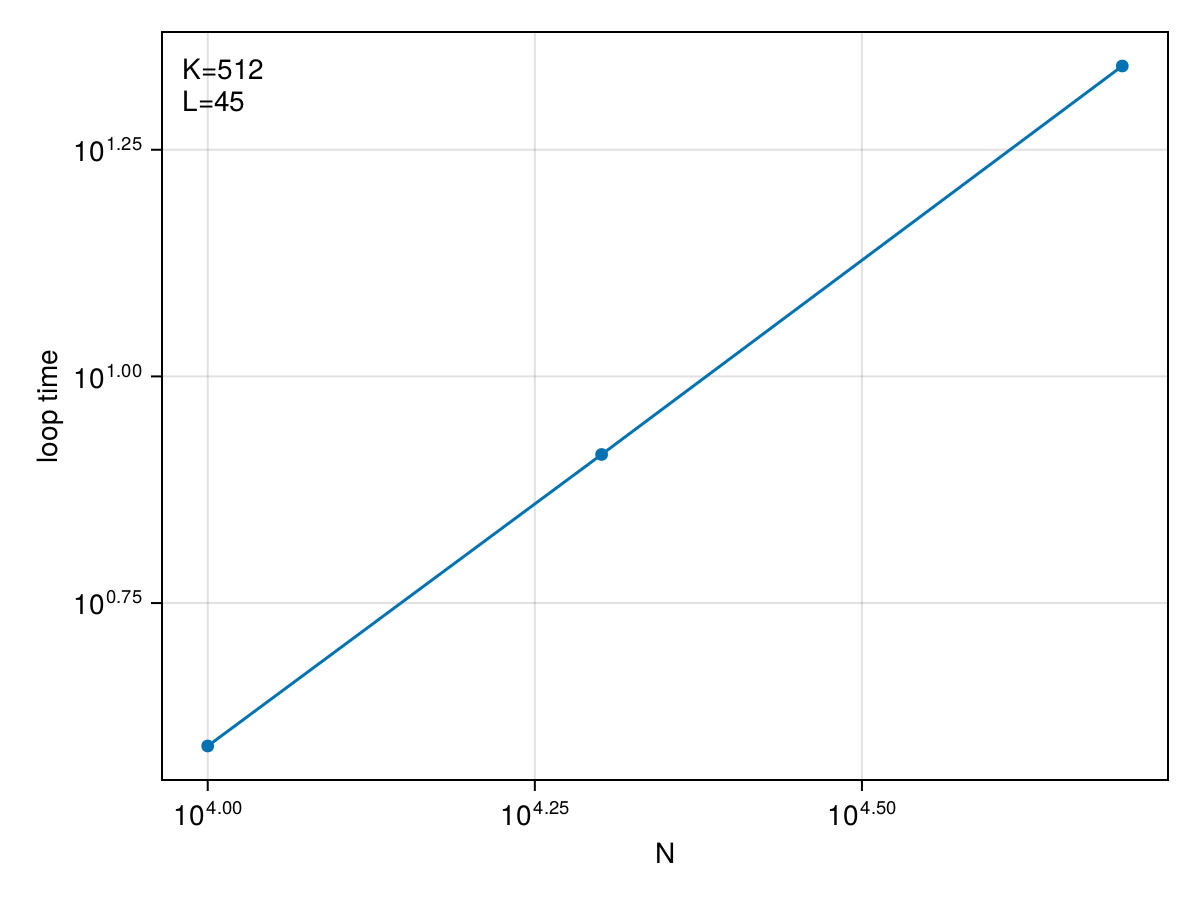

In [14]:
fig, ax, _ = scatterlines(x, y)
ax.xscale = log10
ax.yscale = log10
ax.xlabel = "N"
ax.ylabel = "loop time"
text!(ax, 0,1, text="K=512\nL=45", space = :relative, align = (:left, :top), offset = (10, -10))
fig